# HSE 2024: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [ ]:
def find_product(a,r,N):
    arr_product = []
    cur = a
    for _ in range(N):
        arr_product.append(cur)
        cur *= r
    return arr_product

a = 2
r = 3
N = 3
print(find_product(a,r,N))

[2, 6, 18]


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back.

In [ ]:
def check_palindrome(N):
    str_N = str(N)
    res = (str_N == str_N[::-1])
    return res

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [ ]:
def find_palindromes(N):
    palindromes = []
    num = 1000
    cnt = 0
    while cnt < N:
        if check_palindrome(num):
            palindromes.append(num)
            cnt += 1
        num += 1
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [ ]:
from random import randint
def find_min(a, b, c):
    min_ = a
    if b < min_:
        min_ = b
    if c < min_:
        min_ = c
    return min_

for i in range(10):

    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMinimum:', find_min(a, b, c))

90 -14 -9 	Minimum: -14
59 -42 43 	Minimum: -42
72 54 44 	Minimum: 44
-65 -5 -89 	Minimum: -89
-33 -60 -36 	Minimum: -60
-94 19 73 	Minimum: -94
-53 5 68 	Minimum: -53
-42 -30 37 	Minimum: -42
-27 -26 87 	Minimum: -27
-100 -60 -9 	Minimum: -100


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [ ]:
my_array = np.random.rand(17)
my_array /= np.sum(my_array) / 6
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [ ]:
def calculate_manhattan(a, b):
    distance = np.sum(np.abs(a - b))
    return distance

def calculate_euclidean(a, b):
    distance = np.sqrt(np.sum((a - b) ** 2))
    return distance

def calculate_chebyshev(a, b):
    distance = np.max(np.abs(a - b))
    return distance

def calculate_cosine(a, b):
    distance = 1 - np.sum(a * b) / (np.sqrt(np.sum(a ** 2)) * np.sqrt(np.sum(b ** 2)))
    return distance

In [ ]:
a = np.random.rand(5)
b = np.random.rand(5)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 1.329742737024798
Euclidean distance: 0.6970732318416085
Chebyshev distance: 0.5068304412455051
Cosine distance: 0.17771594879370012


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [ ]:
def transform(array):
    max_value = np.max(array)
    min_value = np.min(array)

    transformed_array = (array - min_value) / (max_value - min_value) * 3 - 4
    return transformed_array

In [ ]:
my_array = np.random.randint(-100, 100, size=76)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-3.63451777 -1.30456853 -1.63959391 -1.67005076 -2.47715736 -3.4213198
 -3.22335025 -2.43147208 -2.17258883 -2.08121827 -3.66497462 -1.24365482
 -1.94416244 -2.87309645 -3.61928934 -2.34010152 -3.36040609 -2.18781726
 -3.04060914 -1.10659898 -1.8680203  -3.74111675 -2.03553299 -4.
 -2.84263959 -2.65989848 -3.80203046 -1.97461929 -2.35532995 -2.14213198
 -3.63451777 -1.04568528 -1.39593909 -3.75634518 -1.67005076 -1.94416244
 -2.00507614 -3.60406091 -3.28426396 -3.74111675 -1.12182741 -1.
 -2.76649746 -1.73096447 -2.78172589 -2.65989848 -3.40609137 -2.17258883
 -2.94923858 -3.39086294 -3.22335025 -1.27411168 -1.54822335 -1.21319797
 -3.20812183 -1.07614213 -3.14720812 -1.09137056 -3.43654822 -1.88324873
 -3.43654822 -3.83248731 -1.54822335 -2.91878173 -3.05583756 -2.05076142
 -3.20812183 -1.2284264  -1.07614213 -1.92893401 -2.53807107 -1.35025381
 -2.55329949 -2.84263959 -1.65482234 -1.56345178]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [ ]:
my_array = np.random.randint(-7, 44, size=(8, 5))
selected_column = my_array[:, np.unravel_index(np.argmax(my_array), my_array.shape)[1]]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[36  2 -1 25 23]
 [30 20 -1 20  7]
 [27 14 32 15 -5]
 [22 42 19  8  1]
 [32 15 27 -5 35]
 [28 38 40  0 15]
 [39 21 29 28 33]
 [17 42 -4 23 32]]
Selected column: [ 2 20 14 42 15 38 21 42]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [ ]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.63408526        nan        nan 0.76214623 0.16468092 0.48970127
        nan 0.11853787 0.72049109        nan]


In [ ]:
def replace_missing(arr):
    median = np.nanmedian(arr)
    array_without_missing = np.where(np.isnan(arr), median, arr)
    return array_without_missing

In [ ]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.63408526 0.56189326 0.56189326 0.76214623 0.16468092 0.48970127
 0.56189326 0.11853787 0.72049109 0.56189326]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [ ]:
def mean_channel(X):
    mean_vector = np.mean(X, axis=(0, 1))
    return mean_vector

In [ ]:
n = 2
m = 2
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(X)
print(f'Vector of means: {mean_channel(X)}')

[[[  5 -11  -2]
  [  7  -3   1]]

 [[  1 -10 -10]
  [  2   1   3]]]
Vector of means: [ 3.75 -5.75 -2.  ]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [ ]:
def get_unique_columns(X):
    X_unique = np.unique(X, axis=1)
    return X_unique

In [ ]:
##X = np.random.randint(4, 6, size=(n, 3, 3))
X = np.array([[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]])

print('Matrix:')
print(X)
print('Unique columns:')
get_unique_columns(X)

Matrix:
[[[1 2 3]
  [1 2 3]
  [1 2 3]]

 [[4 5 6]
  [4 5 7]
  [4 5 6]]

 [[7 8 9]
  [7 8 9]
  [7 8 9]]]
Unique columns:


array([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [62]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
      Yes, there are in the columns 'Age', 'Cabin', 'Embarked'
    * What is the percentage of survived passengers? Are the classes balanced?
      38,(38)%. The class is unbalanced
    * Were there more males or females?
      There are more men
    * What what the least popular port of embarkation?
      Queenstown
    * How many classes (pclass) were there on Tinanic?
      Number of classes on Titanic: 3
    * What is the overall average ticket fare? And for every class?
      32.2.
      1    84.154687
      2    20.662183
      3    13.675550
Please, write not only the answers but the code, proving it.

In [63]:
## Your code here
missing_values = dataset.isnull().sum()
missing_columns = missing_values[missing_values > 0].index.tolist()
print("Missing values in columns:", missing_columns)


# Calculate the percentage of survived passengers
total_passengers = dataset.shape[0]
survived_passengers = dataset['Survived'].sum()
percentage_survived = (survived_passengers / total_passengers) * 100

# Check the balance of passenger classes
class_counts = dataset.groupby('Pclass')['Survived'].sum() / dataset['Pclass'].value_counts()

print("Percentage of survived passengers:", percentage_survived)
print("Class distribution (percentage):", class_counts)

# Count the number of males and females
gender_counts = dataset['Sex'].value_counts()
print("Gender counts:", gender_counts)

# Determine the least popular port of embarkation
embarkation_counts = dataset['Embarked'].value_counts()
least_popular_port = embarkation_counts.idxmin()
print("Least popular port of embarkation:", least_popular_port)

# Count the number of unique classes (pclass)
unique_classes = dataset['Pclass'].nunique()
print("Number of classes on Titanic:", unique_classes)

# Calculate the overall average ticket fare and the average fare for each class
average_fare_overall = dataset['Fare'].mean()
average_fare_by_class = dataset.groupby('Pclass')['Fare'].mean()

print("Overall average ticket fare:", average_fare_overall)
print("Average fare by class:", average_fare_by_class)

Missing values in columns: ['Age', 'Cabin', 'Embarked']
Percentage of survived passengers: 38.38383838383838
Class distribution (percentage): Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64
Gender counts: Sex
male      577
female    314
Name: count, dtype: int64
Least popular port of embarkation: Q
Number of classes on Titanic: 3
Overall average ticket fare: 32.204207968574636
Average fare by class: Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
      Minimum Age: 0.42
      Maximum Age: 80.0
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
      Overall Mean Age: 29.69911764705882
      Mean Age (Male): 30.72664459161148
      Mean Age (Female): 27.915708812260537
    * Make conclusions about what you see on the plot
      There were quite a few newborns on the ship.
      The average age does not differ much between men and women. It remains on average at 29.7 years.

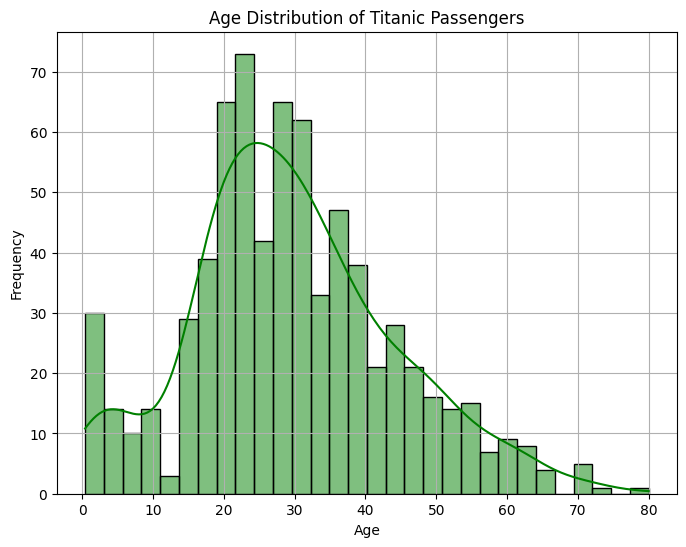

Minimum Age: 0.42
Maximum Age: 80.0


In [64]:
## Your code here
data = dataset.dropna(subset=['Age'])

min_age = data['Age'].min()
max_age = data['Age'].max()

plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='green')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Minimum Age:", min_age)
print("Maximum Age:", max_age)

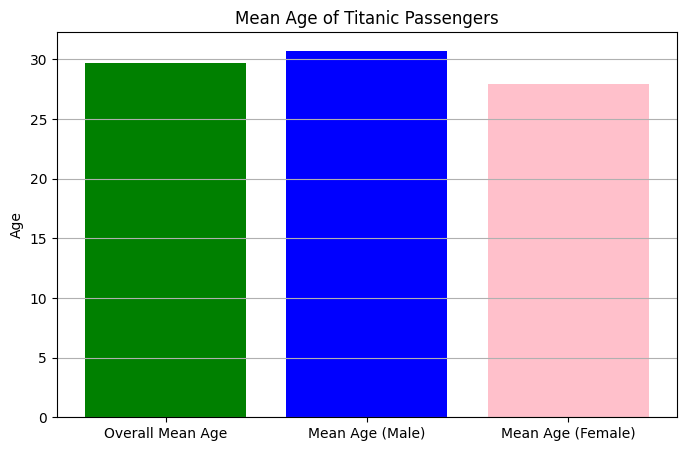

Overall Mean Age: 29.69911764705882
Mean Age (Male): 30.72664459161148
Mean Age (Female): 27.915708812260537


In [65]:
## Your code here
mean_age_overall = dataset['Age'].mean()
mean_age_male = dataset[dataset['Sex'] == 'male']['Age'].mean()
mean_age_female = dataset[dataset['Sex'] == 'female']['Age'].mean()

mean_ages = {
    'Overall Mean Age': mean_age_overall,
    'Mean Age (Male)': mean_age_male,
    'Mean Age (Female)': mean_age_female
}

plt.figure(figsize=(8, 5))
plt.bar(mean_ages.keys(), mean_ages.values(), color=['green', 'blue', 'pink'])
plt.title('Mean Age of Titanic Passengers')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()

print("Overall Mean Age:", mean_age_overall)
print("Mean Age (Male):", mean_age_male)
print("Mean Age (Female):", mean_age_female)

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
      17
    * How many are there passengers with every title?
      891
    * What is the most popular man's title? And woman's title?
      Mr and Miss
    
**Hint** You may select the title from the name as a word which contains a dot.

In [69]:
## Your code here
dataset['Title'] = dataset['Name'].str.extract(r',\s*([^\.]+)\.')

unique_titles = dataset['Title'].unique()
print(f"Unique Titles: {unique_titles}")
print(f"Unique Titles: {len(unique_titles)}")

title_counts = dataset['Title'].value_counts()
print(f"\nTitle Counts:\n{title_counts}")
print(title_counts.sum())

male_titles = dataset[dataset['Sex'] == 'male']['Title'].value_counts()
female_titles = dataset[dataset['Sex'] == 'female']['Title'].value_counts()


most_popular_male_title = male_titles.idxmax()
most_popular_female_title = female_titles.idxmax()

print(f"\nMost Popular Male Title: {most_popular_male_title}")
print(f"Most Popular Female Title: {most_popular_female_title}")

Unique Titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
Unique Titles: 17

Title Counts:
Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64
891

Most Popular Male Title: Mr
Most Popular Female Title: Miss


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



In [73]:
## You code here
correlation = dataset['Pclass'].corr(dataset['Fare'])
print(f"Correlation between Pclass and Fare: {correlation}")

Correlation between Pclass and Fare: -0.5494996199439074

Mean fare by port of embarkation:
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


In [95]:
mean_fare_by_port = dataset.groupby('Pclass')['Fare'].mean()
print("\nMean fare by port of pclass:")
print(mean_fare_by_port)


Mean fare by port of embarkation:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


<ipython-input-98-ed56d2c2dac3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=dataset, palette="Set3")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a 

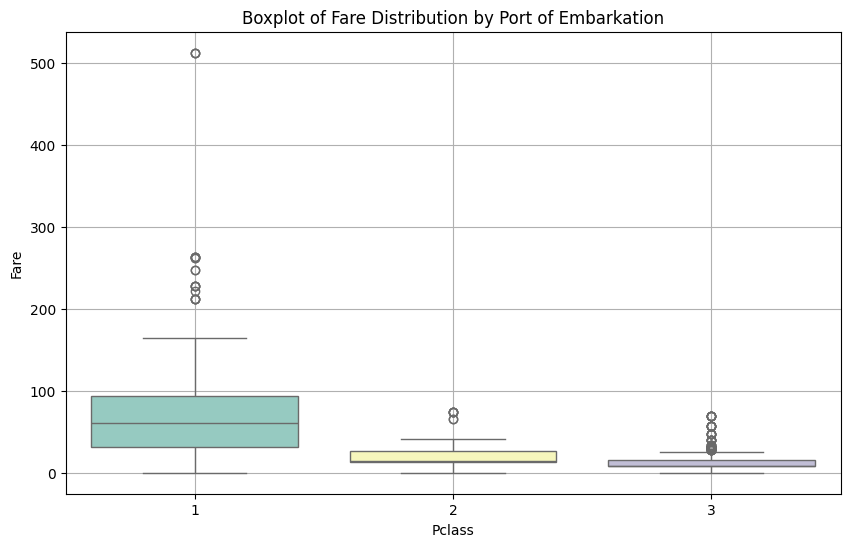

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

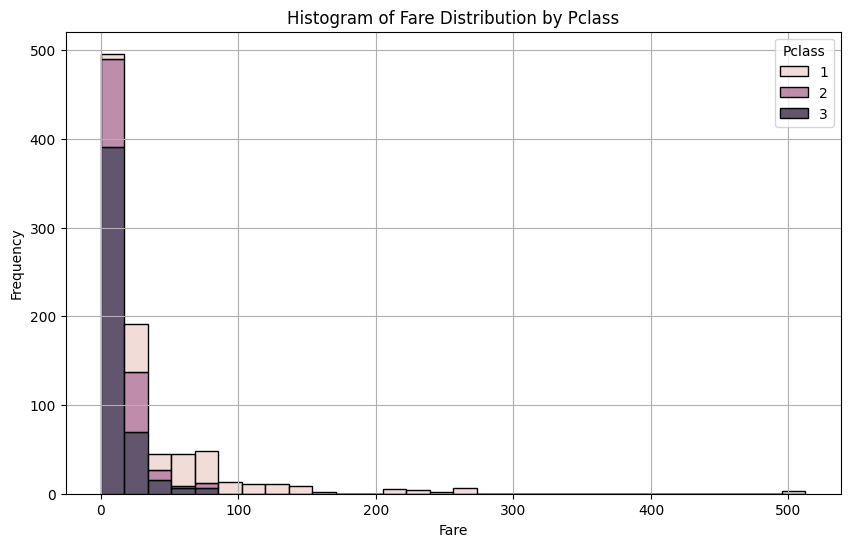

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=dataset, palette="Set3")
plt.title('Boxplot of Fare Distribution by Port of Embarkation')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Fare', hue='Pclass', multiple='stack', bins=30)
plt.title('Histogram of Fare Distribution by Pclass')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

There is a moderate negative correlation. This means that the better the class, the higher the price. Class 1 ticket prices vary widely. The smallest deviation is for tickets number 3

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [100]:
data['Embarked'] = dataset['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

correlation = data['Embarked'].corr(dataset['Fare'])
print(f"\nCorrelation between Embarked and Fare: {correlation}")

mean_fare_by_port = dataset.groupby('Embarked')['Fare'].mean()
print("\nMean fare by port of embarkation:")
print(mean_fare_by_port)



Correlation between Embarked and Fare: -0.2835104441458671

Mean fare by port of embarkation:
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


<ipython-input-100-4f178579dba7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = dataset['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

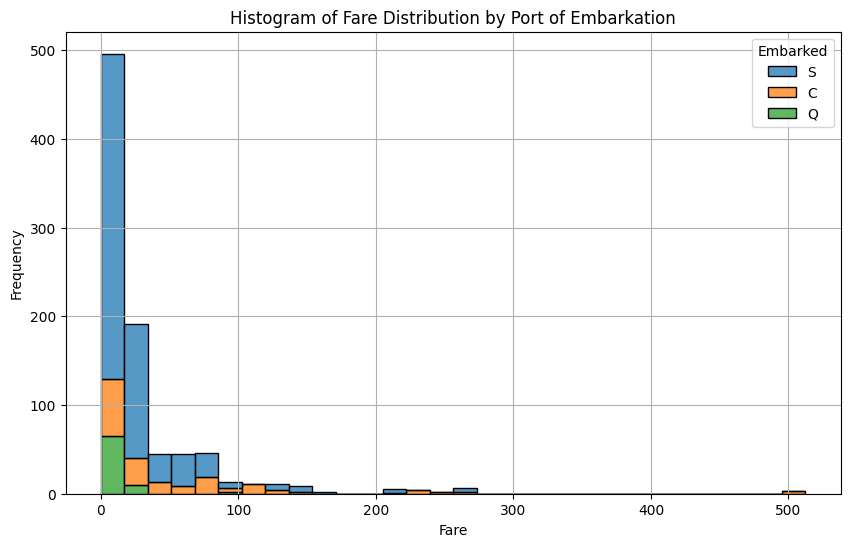

<ipython-input-97-3ee4ecab23c3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Embarked', y='Fare', data=dataset, inner="quartile", palette="muted")


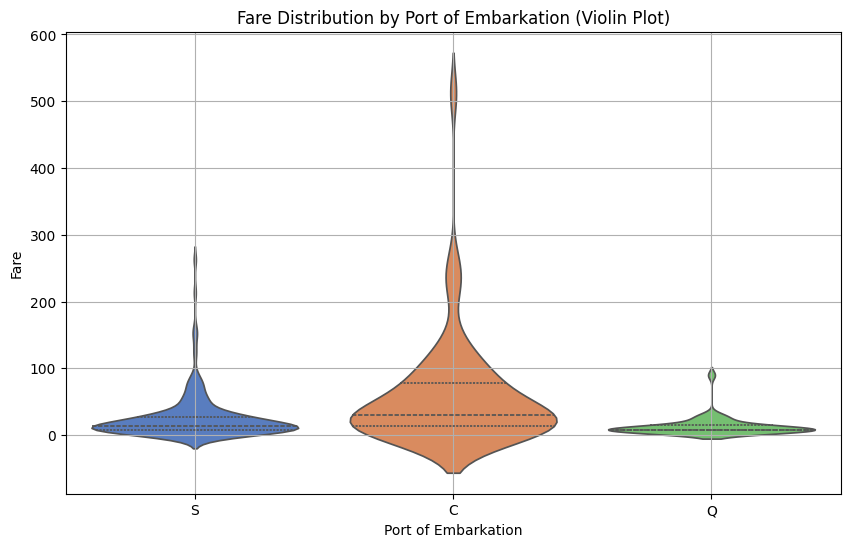

In [97]:
plt.figure(figsize=(10, 6))

sns.histplot(data=dataset, x='Fare', hue='Embarked', multiple='stack', bins=30)
plt.title('Histogram of Fare Distribution by Port of Embarkation')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Embarked', y='Fare', data=dataset, inner="quartile", palette="muted")
plt.title('Fare Distribution by Port of Embarkation (Violin Plot)')
plt.ylabel('Fare')
plt.xlabel('Port of Embarkation')
plt.grid(True)
plt.show()

The graphs show that landing in Cherbourg is on average the most expensive, but at the same time the price range is the largest. (since there is a column in the histogram at 500). The cheapest prices were in Queenstown and the average price was 13.27

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

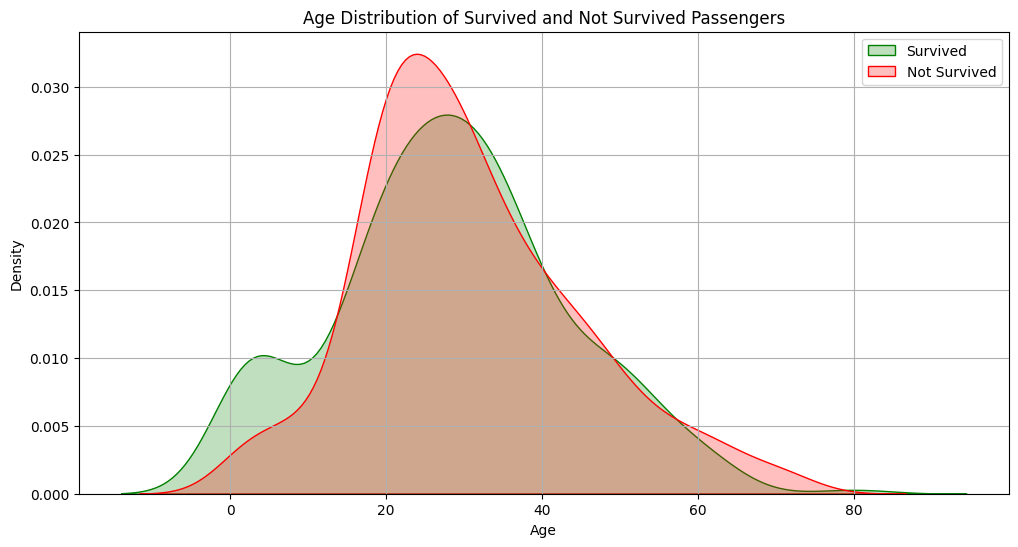

In [101]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dataset[dataset['Survived'] == 1]['Age'], label='Survived', color='green', fill=True)
sns.kdeplot(data=dataset[dataset['Survived'] == 0]['Age'], label='Not Survived', color='red', fill=True)
plt.title('Age Distribution of Survived and Not Survived Passengers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Young people have a higher chance of survival

<ipython-input-110-196302300e6f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=dataset[dataset['Survived'] == 1][dataset['Pclass'] == 3]['Age'], label='Survived', color='green', fill=True)
<ipython-input-110-196302300e6f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=dataset[dataset['Survived'] == 0][dataset['Pclass'] == 3]['Age'], label='Not Survived', color='red', fill=True)


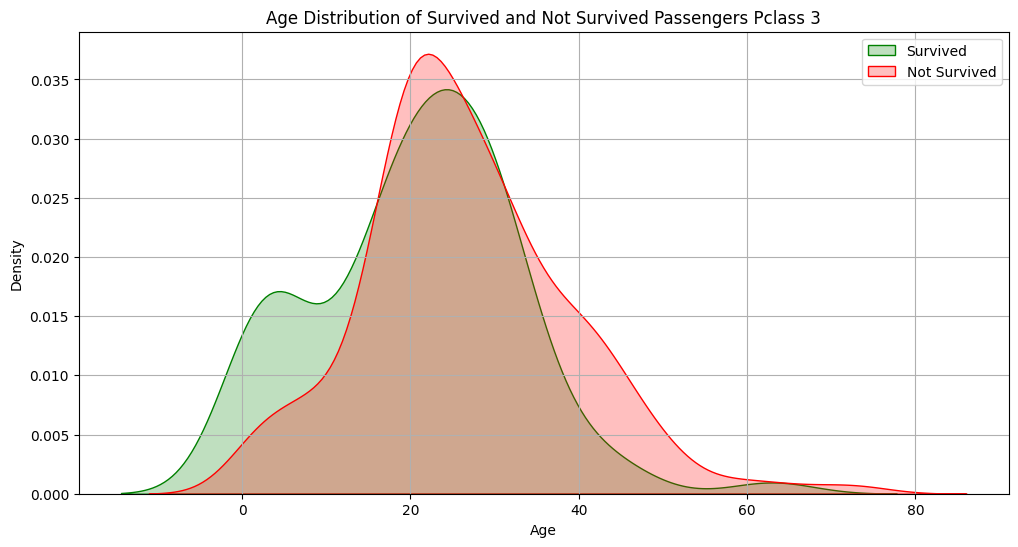

In [110]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dataset[dataset['Survived'] == 1][dataset['Pclass'] == 3]['Age'], label='Survived', color='green', fill=True)
sns.kdeplot(data=dataset[dataset['Survived'] == 0][dataset['Pclass'] == 3]['Age'], label='Not Survived', color='red', fill=True)
plt.title('Age Distribution of Survived and Not Survived Passengers Pclass 3')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Young people from this class are more likely to survive

<ipython-input-111-4ceed4c6e1e7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=dataset[dataset['Survived'] == 1][dataset['Pclass'] == 1]['Age'], label='Survived', color='green', fill=True)
<ipython-input-111-4ceed4c6e1e7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=dataset[dataset['Survived'] == 0][dataset['Pclass'] == 1]['Age'], label='Not Survived', color='red', fill=True)


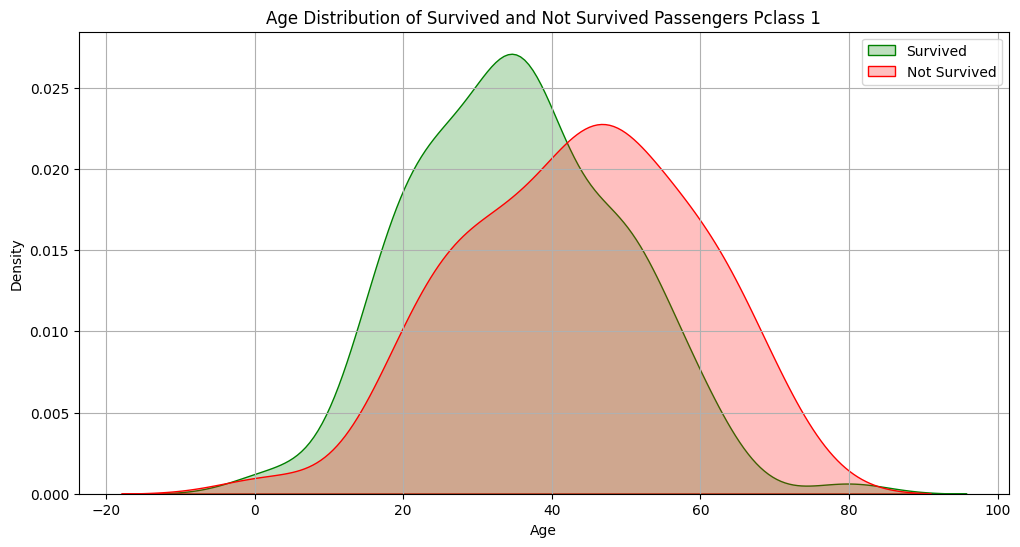

In [111]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dataset[dataset['Survived'] == 1][dataset['Pclass'] == 1]['Age'], label='Survived', color='green', fill=True)
sns.kdeplot(data=dataset[dataset['Survived'] == 0][dataset['Pclass'] == 1]['Age'], label='Not Survived', color='red', fill=True)
plt.title('Age Distribution of Survived and Not Survived Passengers Pclass 1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

The survival rate relative to death graph is shifted slightly to the left

<ipython-input-112-747f3c22c14f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=dataset[dataset['Survived'] == 1][dataset['Pclass'] == 2]['Age'], label='Survived', color='green', fill=True)
<ipython-input-112-747f3c22c14f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=dataset[dataset['Survived'] == 0][dataset['Pclass'] == 2]['Age'], label='Not Survived', color='red', fill=True)


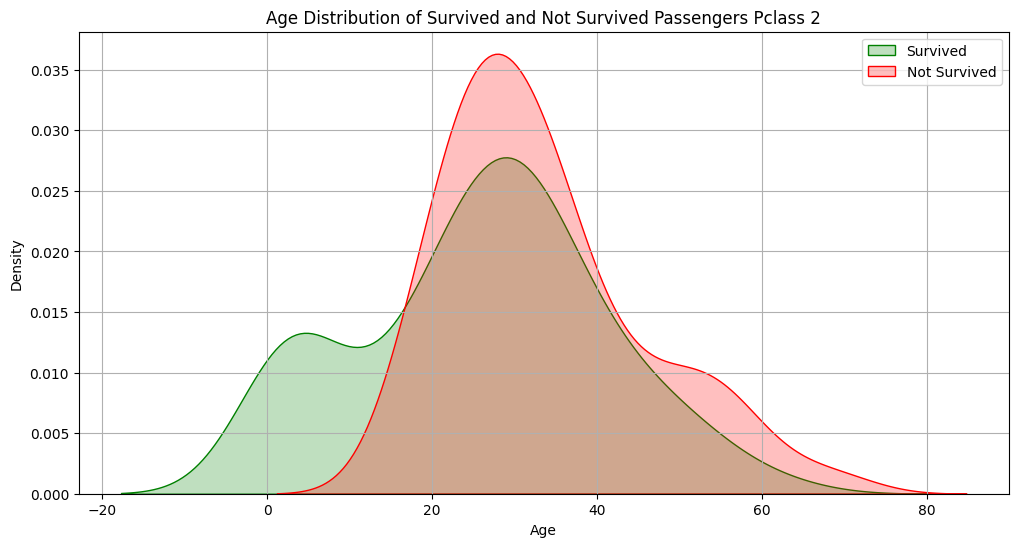

In [112]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dataset[dataset['Survived'] == 1][dataset['Pclass'] == 2]['Age'], label='Survived', color='green', fill=True)
sns.kdeplot(data=dataset[dataset['Survived'] == 0][dataset['Pclass'] == 2]['Age'], label='Not Survived', color='red', fill=True)
plt.title('Age Distribution of Survived and Not Survived Passengers Pclass 2')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Young people from this class are more likely to survive

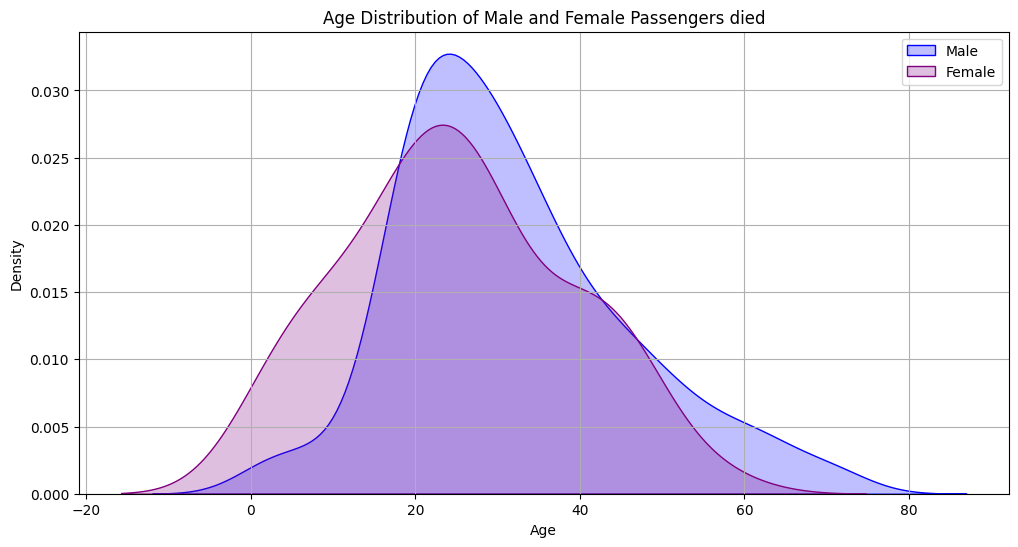

In [115]:

plt.figure(figsize=(12, 6))
sns.kdeplot(data=dataset[dataset['Sex'] == 'male']['Age'][dataset['Survived'] == 0], label='Male', color='blue', fill=True)
sns.kdeplot(data=dataset[dataset['Sex'] == 'female']['Age'][dataset['Survived'] == 0], label='Female', color='purple', fill=True)
plt.title('Age Distribution of Male and Female Passengers died')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

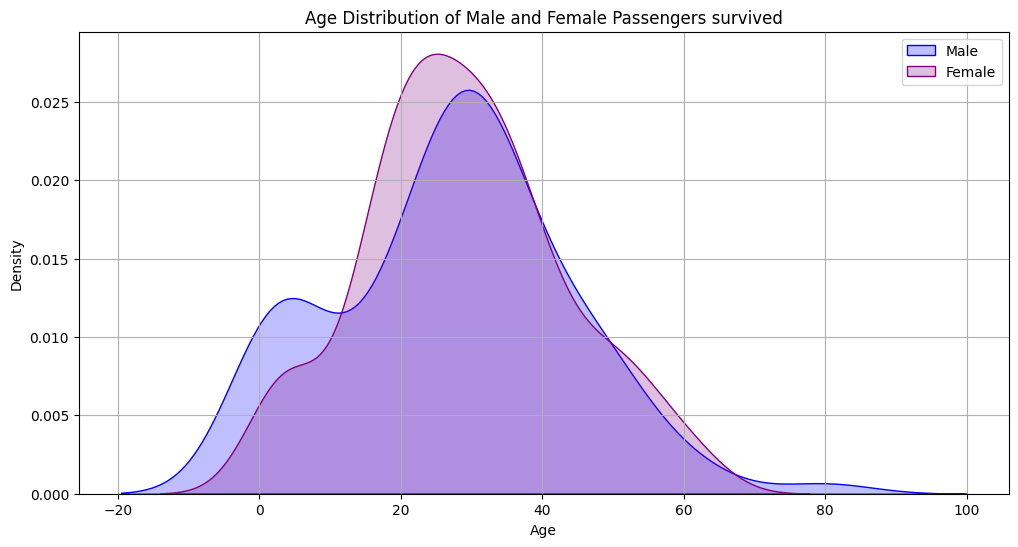

In [116]:

plt.figure(figsize=(12, 6))
sns.kdeplot(data=dataset[dataset['Sex'] == 'male']['Age'][dataset['Survived'] == 1], label='Male', color='blue', fill=True)
sns.kdeplot(data=dataset[dataset['Sex'] == 'female']['Age'][dataset['Survived'] == 1], label='Female', color='purple', fill=True)
plt.title('Age Distribution of Male and Female Passengers survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

On average, younger women are more likely to die, while middle-aged men are a bit more likely to survive.